In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
output_dir = "/Users/joeschlessinger/Documents/jschless.github.io/assets/militarypay"

pay_tables = []
years = [1922, 1949, 1952, 1955, 1958, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
for y in years:
    temp_df = pd.read_csv(os.path.join('./pay_tables', str(y)+'.txt'), sep=" ")
    temp_df["year"] = y
    pay_tables.append(temp_df)

cols = ['Rank', '2', '3', '6', '10', '12', '16', '18', '22', '24', '26', '30',
        'year', '2.1', '4', '8', '14', '20', '28', '32', '34', '36', '38', '40']

def convert_to_numeric(x):
    if x.name == "Rank":
        return x
    else:
        return pd.to_numeric(x)
df = (
    pd.concat(pay_tables)[cols]
    .applymap(lambda x: x.replace(",", "") if type(x) == str else x)
    .apply(convert_to_numeric) 
    .applymap(lambda x: np.nan if x == -1 else x)
    .fillna(method="ffill")
)



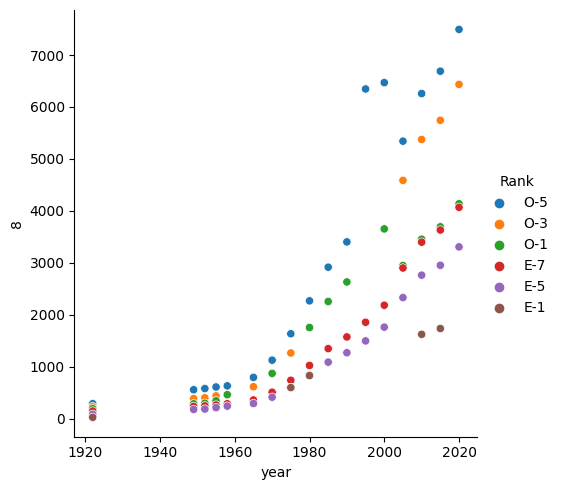

In [7]:
ranks_of_interest = set(["O-1", "O-3", "O-5", "E-1", "E-5", "E-7"])
query = df[df.Rank.isin(ranks_of_interest)]
import seaborn as sns
sns.relplot(query, x="year", y="8", hue="Rank")

In [8]:
american_income_df = pd.read_csv('./pay_tables/american_income.csv')
american_income_df["Year"] = pd.to_numeric(american_income_df.Year.apply(lambda x: x[:4]))
american_income_df["Monthly_Wage_Median"] = american_income_df.Median_Income.apply(lambda x: float(x.replace(',', ''))/12)
american_income_df["Monthly_Wage_Mean"] = american_income_df.Mean_Income.apply(lambda x: float(x.replace(',', ''))/12)
american_income_df


,Year,NumberPeople,Median_Income,Mean_Income,Monthly_Wage_Median,Monthly_Wage_Mean
0,2021,"237,500","37,522","57,143",3126.833333,4761.916667
1,2020,"236,357","35,855","54,036",2987.916667,4503.000000
2,2019,"235,292","35,977","54,129",2998.083333,4510.750000
3,2018,"232,139","33,706","50,413",2808.833333,4201.083333
4,2017,"231,205","31,962","48,986",2663.500000,4082.166667
...,...,...,...,...,...,...
72,1951,"72,676","2,200","2,587",183.333333,215.583333
73,1950,"72,236","1,971","2,376",164.250000,198.000000
74,1949,"71,768","1,814","2,187",151.166667,182.250000
75,1948,"70,095","1,889","2,244",157.416667,187.000000


In [9]:
query[query.Rank == "O-5"].applymap(lambda x: np.nan if x==-1 else x).fillna(method="ffill")

,Rank,2,3,6,10,12,16,18,22,24,...,4,8,14,20,28,32,34,36,38,40
5,O-5,250.00,262.50,275.00,NaN,300.0,312.50,325.00,393.75,408.33,...,NaN,287.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,456.00,484.50,527.25,584.25,25.2,26.25,216.67,225.00,233.33,...,498.75,555.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,474.24,503.88,548.34,607.62,147.0,191.10,236.96,225.00,233.33,...,518.70,577.98,176.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,474.24,530.40,577.20,639.60,670.8,198.74,236.96,225.00,233.33,...,561.60,608.40,183.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,474.24,540.00,590.00,680.00,720.0,775.00,257.50,225.00,233.33,...,560.00,630.00,745.00,335.4,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,545.40,684.60,744.00,852.90,901.8,961.50,350.00,506.00,233.33,...,706.20,793.20,928.80,440.0,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,773.40,971.10,1054.50,1209.30,1278.6,1363.50,105.00,110.10,233.33,...,1001.10,1125.00,1317.00,70.2,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,1123.20,1410.30,1530.90,1755.90,1856.7,1979.00,532.50,645.60,233.33,...,1453.50,1633.20,1912.50,605.1,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,1559.10,1957.20,2124.90,2436.90,2577.0,2747.40,772.80,937.50,233.33,...,2016.90,2267.10,2654.70,878.4,NaN,NaN,NaN,NaN,NaN,NaN
5,O-5,2004.60,2516.40,2732.10,3133.20,3313.2,3532.50,1072.20,1301.10,233.33,...,2592.90,2915.10,3413.40,1219.2,NaN,NaN,NaN,NaN,NaN,NaN


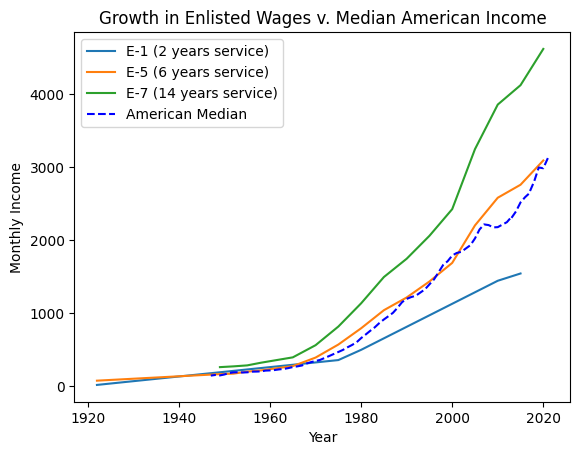

In [45]:
def plot_wages(ranks, years, special_styling=False, include_median=True):

    query = df[df.Rank.isin(set(ranks))]

    import matplotlib.pyplot as plt
    for rank, y in zip(ranks, years):
        temp = query[query.Rank == rank]
        ls = "-"
        if special_styling and "O" in rank:
            ls = "--"
        plt.plot(temp.year, temp[str(y)], label=rank + f" ({y} years service)", ls=ls)
    if include_median:
        plt.plot(american_income_df.Year, american_income_df.Monthly_Wage_Median, 'b--', label="American Median")
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel("Monthly Income")

ranks_of_interest = ["E-1", "E-5", "E-7"]
plot_wages(ranks_of_interest, [2, 6, 14])
plt.title("Growth in Enlisted Wages v. Median American Income")
plt.savefig(os.path.join(output_dir, "enlisted.jpeg"))

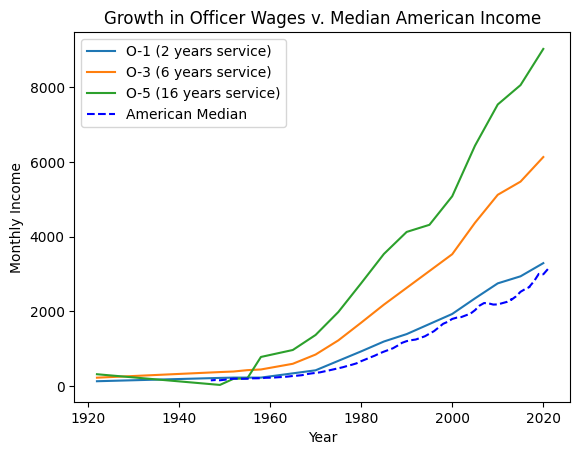

In [43]:
plot_wages(["O-1", "O-3", "O-5"], [2, 6, 16])
plt.title("Growth in Officer Wages v. Median American Income")
plt.savefig(os.path.join(output_dir, "officers.jpeg"))

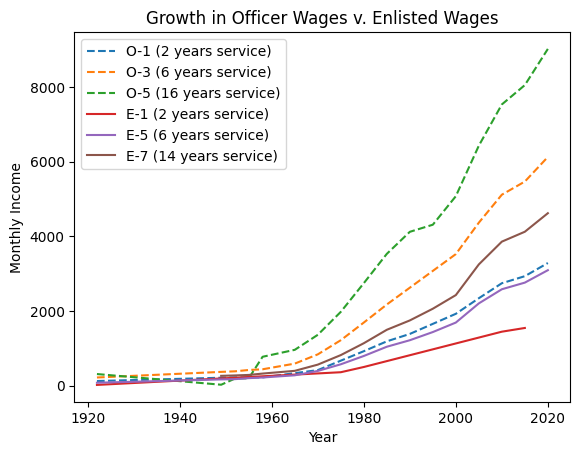

In [47]:
plot_wages(["O-1", "O-3", "O-5", "E-1", "E-5", "E-7"], [2, 6, 16, 2, 6, 14], special_styling=True, include_median=False)
plt.title("Growth in Officer Wages v. Enlisted Wages")
plt.savefig(os.path.join(output_dir, "officers_v_enlisted.jpeg"))

In [5]:
from data import o_pay_1922_1942
for i in range(9)[::-1]:
    temp = f"O-{i} "
    for d in o_pay_1922_1942:
        for k, d2 in d.items():
            if k == i:
                for k1, v1 in d2.items():
                    temp += str(v1) + " "
    print(temp)
    #print(len(temp.split()))

O-8 666.67 666.67 666.67 666.67 666.67 666.67 666.67 666.67 666.67 666.67 666.67 
O-7 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 
O-6 291.67 306.25 320.83 335.42 350.0 364.58 379.17 393.75 408.33 483.33 500.0 
O-5 250.0 262.5 275.0 287.5 300.0 312.5 325.0 393.75 408.33 422.92 497.17 
O-4 200.0 210.0 220.0 230.0 240.0 312.5 325.0 337.5 408.33 422.92 437.5 
O-3 200.0 210.0 220.0 230.0 240.0 250.0 325.0 337.5 350.0 362.5 375.0 
O-2 166.67 175.0 183.33 191.67 240.0 250.0 260.0 270.0 280.0 290.0 300.0 
O-1 125.0 131.25 183.33 191.67 200.0 208.33 216.67 225.0 233.33 241.67 250.0 
O-0 
